In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [408]:
dataset=pd.read_csv('29-bestsellers_with_categories.csv')

In [409]:
missing_data=dataset.isnull().sum()
print("missing data:\n",missing_data)

missing data:
 Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [410]:
# Group by Name and Author, keep average rating and price, max reviews, etc., and include latest Year
dataset = dataset.groupby(['Name', 'Author']).agg({
    'User Rating': 'mean',
    'Reviews': 'max',
    'Price': 'mean',
    'Year': 'max',
    'Genre': 'first',
}).reset_index()

In [411]:
dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.0,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22.0,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.0,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6.0,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12.0,2019,Non Fiction


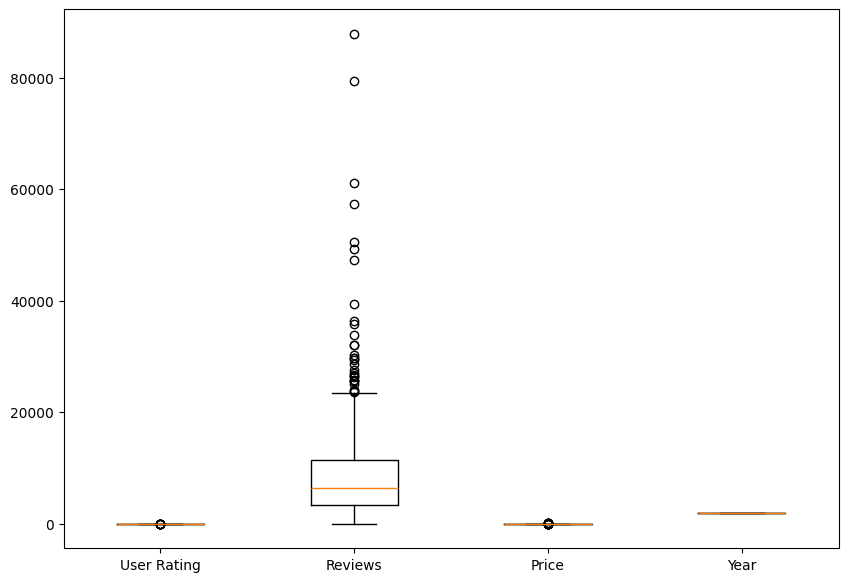

In [412]:
import matplotlib.pyplot as plt
import pandas as pd

numeric_data = dataset.select_dtypes(include=np.number)
plt.figure(figsize=(10, 7))
plt.boxplot([numeric_data[col] for col in numeric_data.columns], tick_labels=numeric_data.columns)
plt.show()

In [413]:
Q1 = dataset['Reviews'].quantile(0.25)
Q3 = dataset['Reviews'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range (IQR) for Reviews:", IQR)

Interquartile Range (IQR) for Reviews: 8028.0


In [ ]:
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset to remove outliers in 'Reviews'
filtered_dataset = dataset[(dataset['Reviews'] >= lower_bound) & (dataset['Reviews'] <= upper_bound)]
filtered_dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.0,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22.0,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.0,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6.0,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12.0,2019,Non Fiction


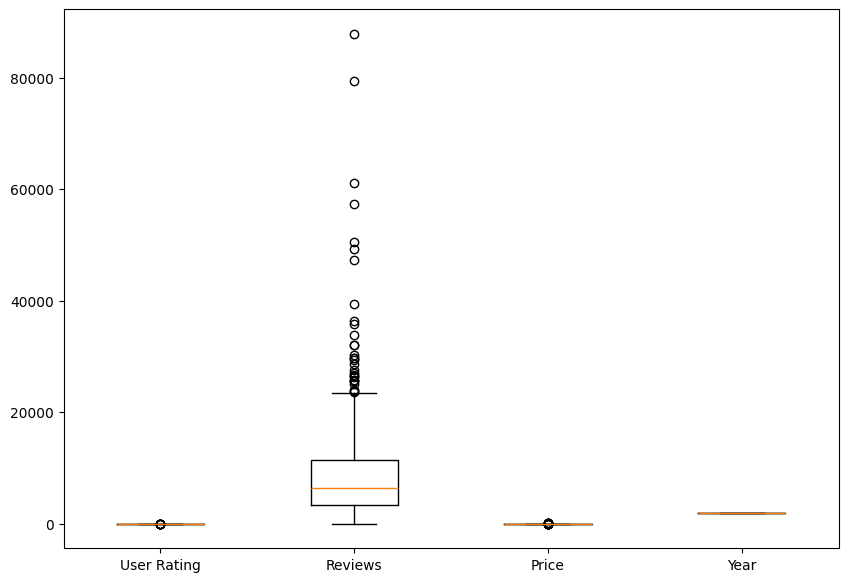

In [415]:
import matplotlib.pyplot as plt
import pandas as pd

numeric_data = filtered_dataset.select_dtypes(include=np.number)
plt.figure(figsize=(10, 7))
plt.boxplot([numeric_data[col] for col in numeric_data.columns], tick_labels=numeric_data.columns)
plt.show()

In [416]:
filtered_dataset = filtered_dataset.drop(columns=['Name'])
print("Dropped 'Name' column from both dataset and filtered_dataset.")

Dropped 'Name' column from both dataset and filtered_dataset.


In [417]:
missing_data=filtered_dataset.isnull().sum()
print("missing data:\n",missing_data)
filtered_dataset.head()

missing data:
 Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


,Author,User Rating,Reviews,Price,Year,Genre
0,JJ Smith,4.7,17350,8.0,2016,Non Fiction
1,Stephen King,4.6,2052,22.0,2011,Fiction
2,Jordan B. Peterson,4.7,18979,15.0,2018,Non Fiction
3,George Orwell,4.7,21424,6.0,2017,Fiction
4,National Geographic Kids,4.8,7665,12.0,2019,Non Fiction


In [418]:
import category_encoders as ce

# Select columns to encode and the target
cols_to_encode = ['Author']
target = 'User Rating'

# Make sure we have a copy, not a view, of the dataset
filtered_dataset = filtered_dataset.copy()

# Initialize and fit the target encoder
encoder = ce.TargetEncoder(cols=cols_to_encode)

# Fit and transform the filtered_dataset
filtered_dataset[cols_to_encode] = encoder.fit_transform(filtered_dataset[cols_to_encode], filtered_dataset[target])

# Ensure the encoded columns are float64
for col in cols_to_encode:
    filtered_dataset[col] = filtered_dataset[col].astype('float64')

print("Filtered dataset after encoding:")
print(filtered_dataset.head())

Filtered dataset after encoding:
     Author  User Rating  Reviews  Price  Year        Genre
0  4.620800          4.7    17350    8.0  2016  Non Fiction
1  4.594851          4.6     2052   22.0  2011      Fiction
2  4.620800          4.7    18979   15.0  2018  Non Fiction
3  4.620800          4.7    21424    6.0  2017      Fiction
4  4.633811          4.8     7665   12.0  2019  Non Fiction


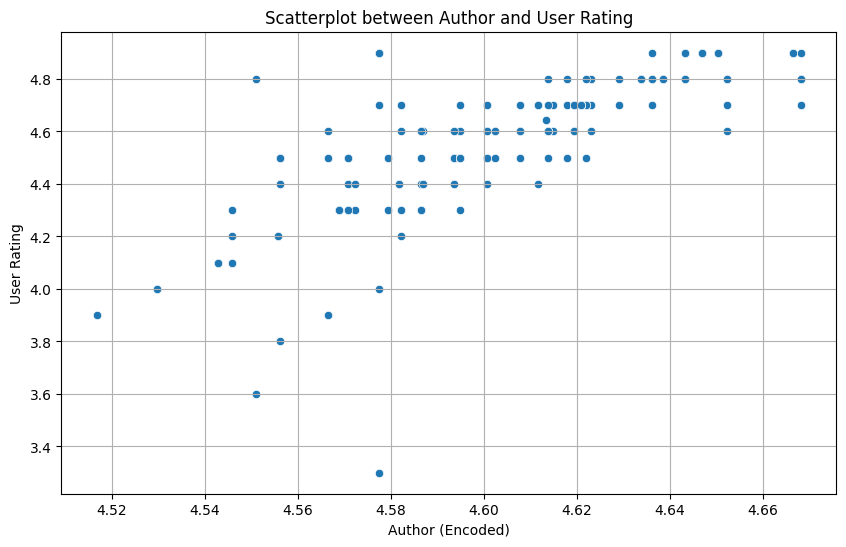

In [419]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_dataset['Author'], y=filtered_dataset['User Rating'])
plt.xlabel('Author (Encoded)')
plt.ylabel('User Rating')
plt.title('Scatterplot between Author and User Rating')
plt.grid(True)
plt.show()

In [420]:
print(filtered_dataset.dtypes)
print(dataset.dtypes)

Author         float64
User Rating    float64
Reviews          int64
Price          float64
Year             int64
Genre           object
dtype: object
Name            object
Author          object
User Rating    float64
Reviews          int64
Price          float64
Year             int64
Genre           object
dtype: object


In [421]:
is_author_numeric = pd.api.types.is_numeric_dtype(filtered_dataset['Author'])
print(f"Is 'Author' column numeric? {is_author_numeric}")

Is 'Author' column numeric? True


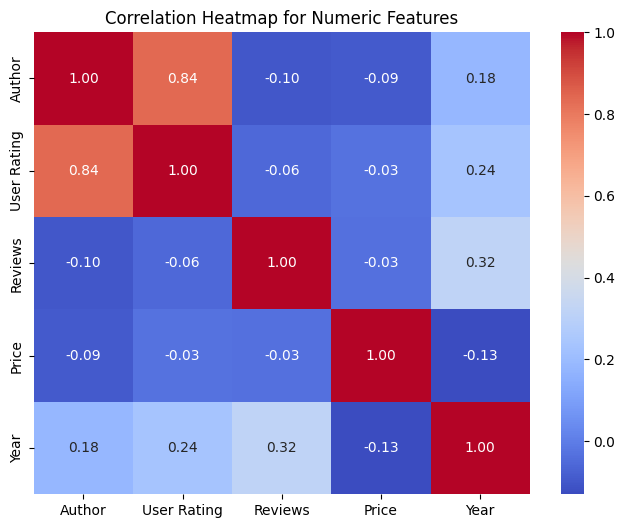

In [422]:
import seaborn as sns

# Compute the correlation matrix
corr = filtered_dataset.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

In [423]:
x=filtered_dataset.iloc[:,[0,2,3,4,5]].values
print(x)

[[4.620799863945869 17350 8.0 2016 'Non Fiction']
 [4.594851278955433 2052 22.0 2011 'Fiction']
 [4.620799863945869 18979 15.0 2018 'Non Fiction']
 ...
 [4.63381071138217 21625 9.0 2017 'Fiction']
 [4.668183141456532 9413 8.0 2019 'Fiction']
 [4.620799863945869 14331 8.0 2019 'Non Fiction']]


In [424]:
y=filtered_dataset.iloc[:,[1]].values
print(y)

[[4.7       ]
 [4.6       ]
 [4.7       ]
 [4.7       ]
 [4.8       ]
 [4.4       ]
 [4.7       ]
 [4.7       ]
 [4.7       ]
 [4.6       ]
 [4.6       ]
 [4.6       ]
 [4.5       ]
 [4.6       ]
 [4.5       ]
 [4.6       ]
 [4.4       ]
 [4.5       ]
 [4.8       ]
 [4.6       ]
 [3.9       ]
 [4.6       ]
 [4.3       ]
 [4.6       ]
 [4.7       ]
 [4.2       ]
 [4.6       ]
 [4.6       ]
 [4.8       ]
 [4.7       ]
 [4.8       ]
 [4.8       ]
 [4.7       ]
 [4.7       ]
 [4.6       ]
 [4.5       ]
 [4.9       ]
 [4.8       ]
 [4.6       ]
 [4.8       ]
 [4.5       ]
 [4.7       ]
 [4.7       ]
 [4.7       ]
 [4.3       ]
 [4.8       ]
 [4.8       ]
 [4.6       ]
 [4.8       ]
 [4.4       ]
 [4.6       ]
 [4.2       ]
 [4.3       ]
 [4.8       ]
 [4.6       ]
 [4.6       ]
 [4.5       ]
 [4.8       ]
 [4.8       ]
 [4.8       ]
 [4.6       ]
 [4.6       ]
 [4.5       ]
 [4.6       ]
 [4.7       ]
 [4.8       ]
 [4.9       ]
 [4.9       ]
 [4.9       ]
 [4.9       ]
 [4.9       ]
 [4.9 

In [425]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

[[0.0 1.0 4.620799863945869 17350 8.0 2016]
 [1.0 0.0 4.594851278955433 2052 22.0 2011]
 [0.0 1.0 4.620799863945869 18979 15.0 2018]
 ...
 [1.0 0.0 4.63381071138217 21625 9.0 2017]
 [1.0 0.0 4.668183141456532 9413 8.0 2019]
 [0.0 1.0 4.620799863945869 14331 8.0 2019]]


avoid dummy variable

In [426]:
x= x[: , 1:]
print(x)

[[1.0 4.620799863945869 17350 8.0 2016]
 [0.0 4.594851278955433 2052 22.0 2011]
 [1.0 4.620799863945869 18979 15.0 2018]
 ...
 [0.0 4.63381071138217 21625 9.0 2017]
 [0.0 4.668183141456532 9413 8.0 2019]
 [1.0 4.620799863945869 14331 8.0 2019]]


In [427]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=1)

In [428]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=1, n_estimators=100)
rf_regressor.fit(x_train, y_train.ravel())

# Predict on the test set
y_pred_rf = rf_regressor.predict(x_test)

# Evaluate the Random Forest model
print(f"Random Forest R² Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf):.4f}")
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")

Random Forest R² Score: 0.7269
Random Forest MAE: 0.0488
Random Forest MSE: 0.0122


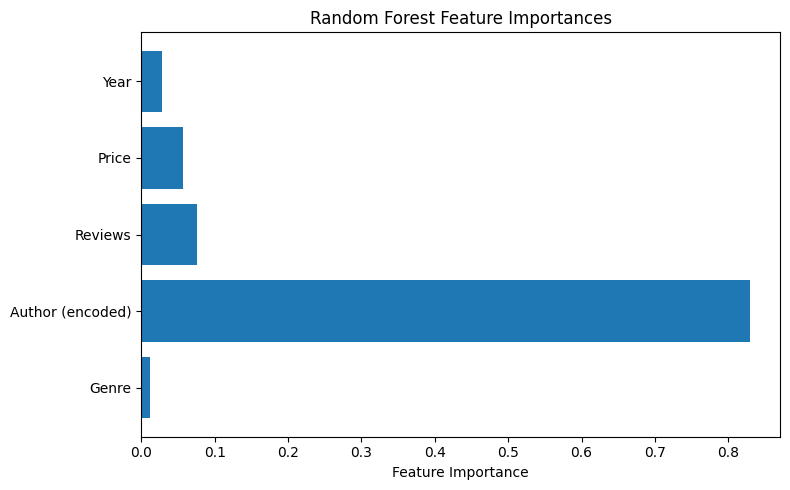

In [429]:
# Get feature importances from the trained Random Forest model
importances = rf_regressor.feature_importances_

# Define feature names to match the columns in x (after encoding)
feature_names = ['Genre', 'Author (encoded)', 'Reviews', 'Price', 'Year']

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

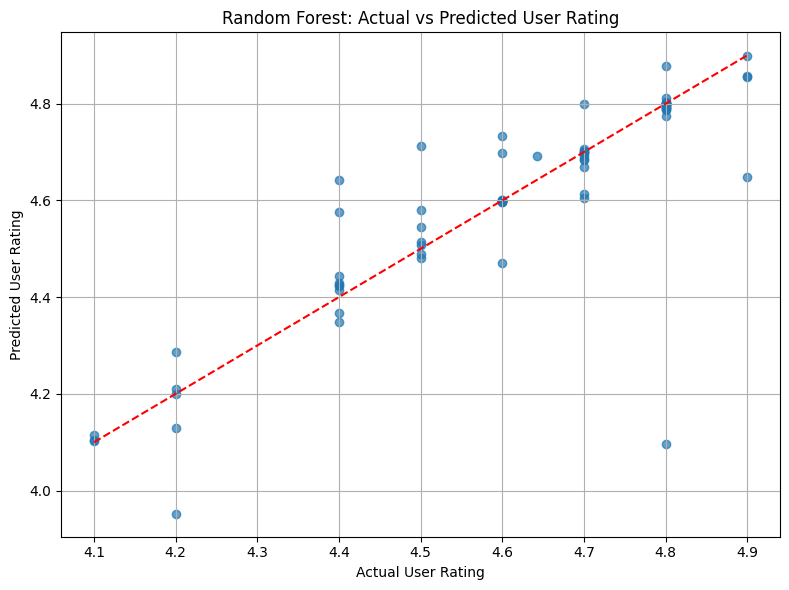

In [430]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.xlabel('Actual User Rating')
plt.ylabel('Predicted User Rating')
plt.title('Random Forest: Actual vs Predicted User Rating')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()

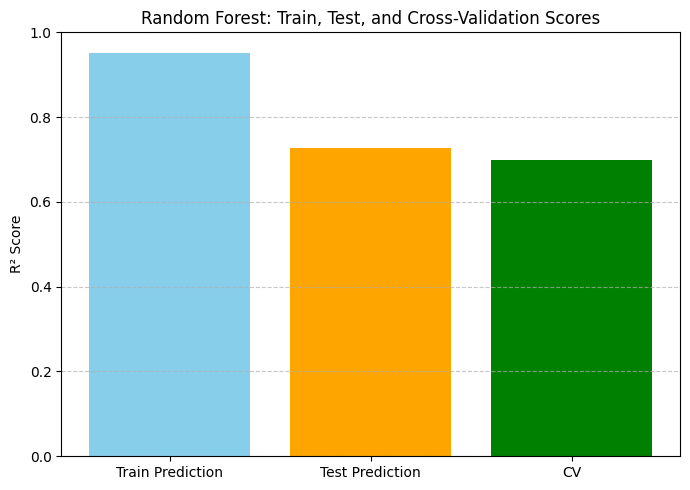

In [431]:
from sklearn.model_selection import cross_val_score

# Calculate cross-validation scores (using 5-fold CV)
cv_scores = cross_val_score(rf_regressor, x_train, y_train.ravel(), cv=5, scoring='r2')

# Calculate R² scores for train and test sets
train_score = rf_regressor.score(x_train, y_train)
test_score = rf_regressor.score(x_test, y_test)
cv_score_mean = cv_scores.mean()

# Prepare data for bar plot
scores = [train_score, test_score, cv_score_mean]
labels = ['Train Prediction', 'Test Prediction', 'CV']

plt.figure(figsize=(7, 5))
plt.bar(labels, scores, color=['skyblue', 'orange', 'green'])
plt.ylabel('R² Score')
plt.title('Random Forest: Train, Test, and Cross-Validation Scores')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

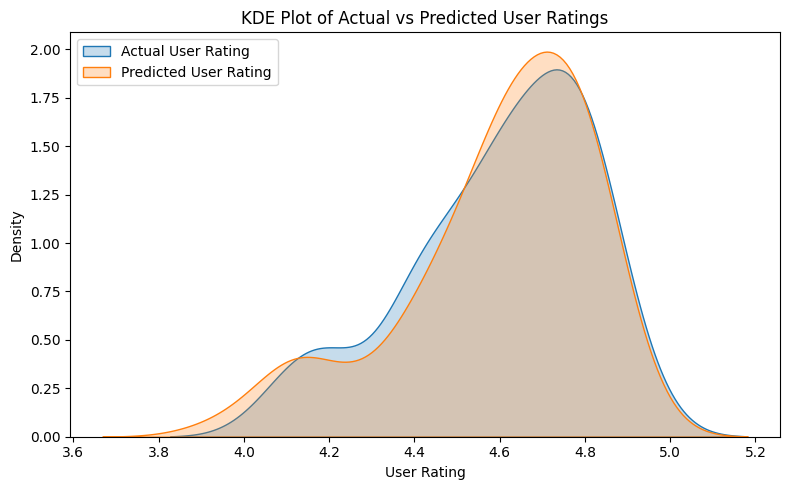

In [432]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(y_test.flatten(), label='Actual User Rating', fill=True)
sns.kdeplot(y_pred_rf, label='Predicted User Rating', fill=True)
plt.xlabel('User Rating')
plt.ylabel('Density')
plt.title('KDE Plot of Actual vs Predicted User Ratings')
plt.legend()
plt.tight_layout()
plt.show()

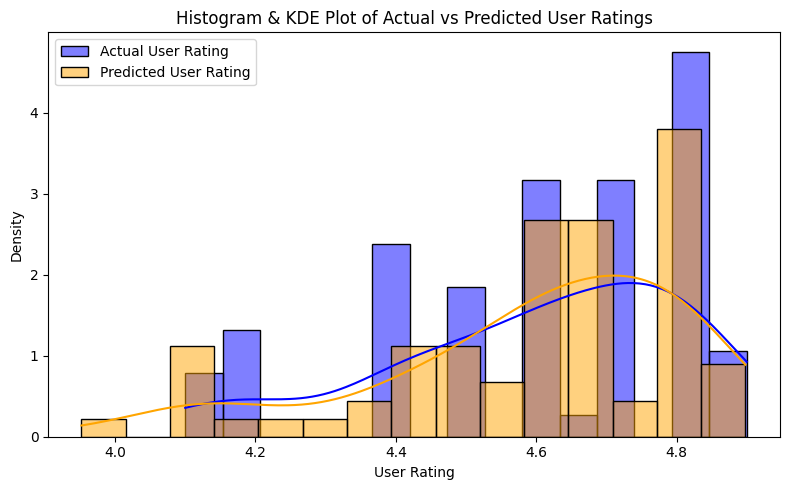

In [433]:
plt.figure(figsize=(8, 5))
sns.histplot(y_test.flatten(), label='Actual User Rating', kde=True, color='blue', stat='density', bins=15, alpha=0.5)
sns.histplot(y_pred_rf, label='Predicted User Rating', kde=True, color='orange', stat='density', bins=15, alpha=0.5)
plt.xlabel('User Rating')
plt.ylabel('Density')
plt.title('Histogram & KDE Plot of Actual vs Predicted User Ratings')
plt.legend()
plt.tight_layout()
plt.show()

In [434]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate metrics for train set
y_train_pred = rf_regressor.predict(x_train)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

# Calculate metrics for test set
test_r2 = r2_score(y_test, y_pred_rf)
test_mae = mean_absolute_error(y_test, y_pred_rf)
test_mse = mean_squared_error(y_test, y_pred_rf)


print("Train Set:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  Mean Absolute Error: {train_mae:.4f}")
print(f"  Mean Squared Error: {train_mse:.4f}\n")

print("Test Set:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  Mean Absolute Error: {test_mae:.4f}")
print(f"  Mean Squared Error: {test_mse:.4f}\n")

print("Cross-Validation:")
print(f"  R² Score (mean): {cv_score_mean:.4f}")

Train Set:
  R² Score: 0.9503
  Mean Absolute Error: 0.0213
  Mean Squared Error: 0.0026

Test Set:
  R² Score: 0.7269
  Mean Absolute Error: 0.0488
  Mean Squared Error: 0.0122

Cross-Validation:
  R² Score (mean): 0.6985
